In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol',
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels',
              'thalassemia', 'target']

In [ ]:
df.dtypes

,0
age,int64
sex,int64
chest_pain_type,int64
resting_blood_pressure,int64
cholesterol,int64
fasting_blood_sugar,int64
rest_ecg,int64
max_heart_rate_achieved,int64
exercise_induced_angina,int64
st_depression,float64


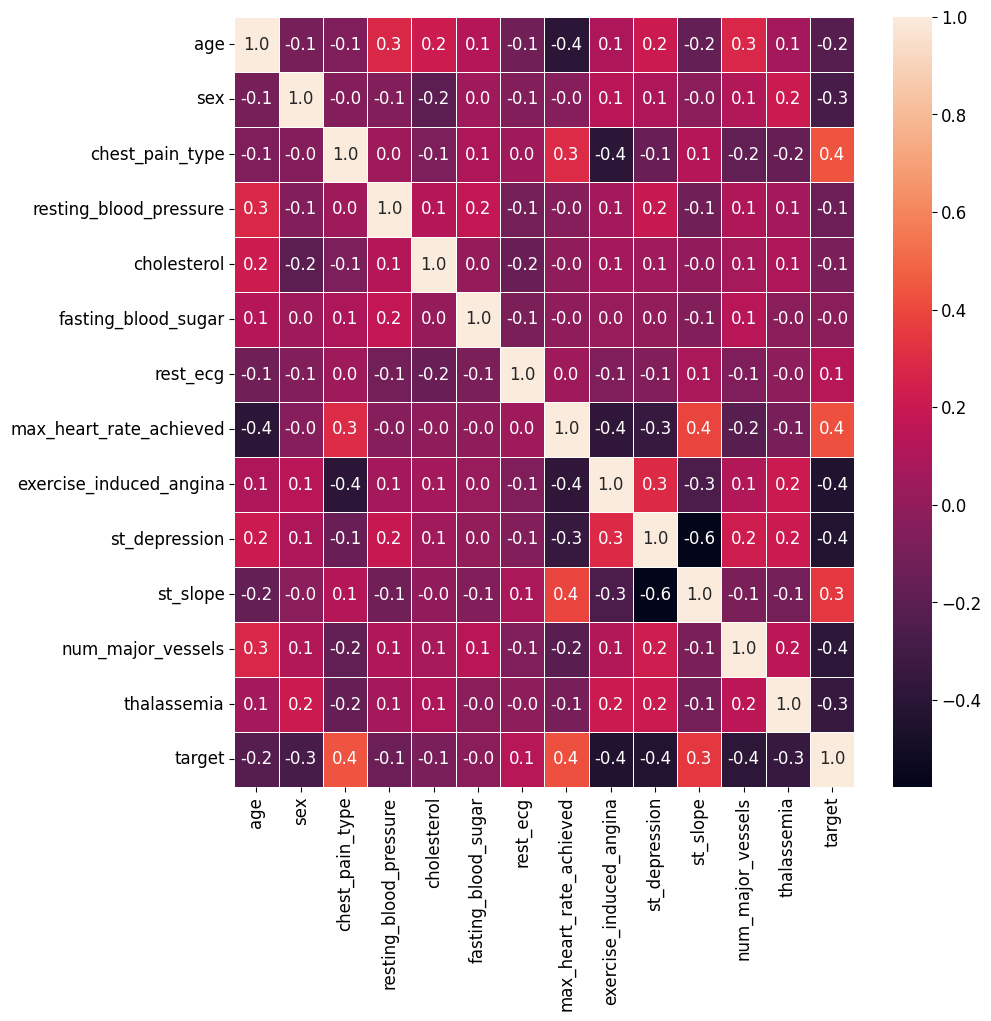

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

<Axes: ylabel='resting_blood_pressure'>

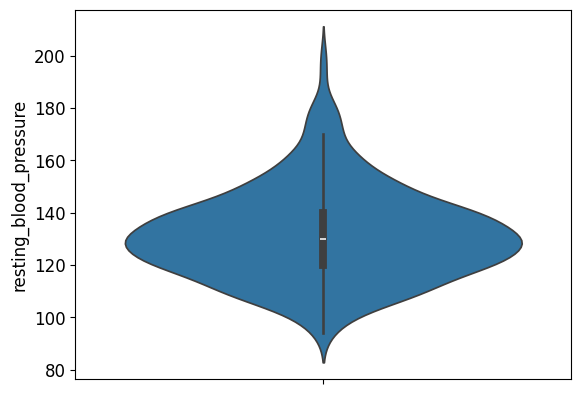

In [ ]:
sns.violinplot(y='resting_blood_pressure',data=df)

<Axes: ylabel='cholesterol'>

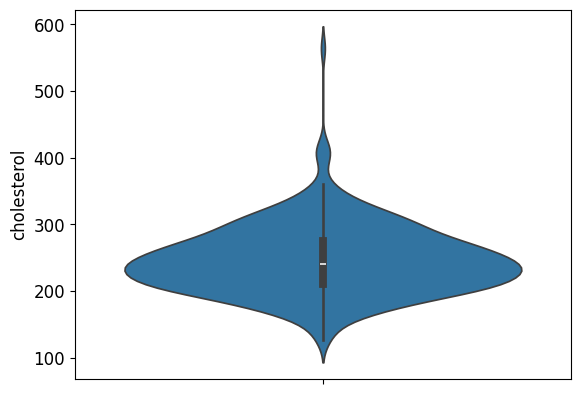

In [ ]:
sns.violinplot(y='cholesterol',data=df)

<Axes: ylabel='max_heart_rate_achieved'>

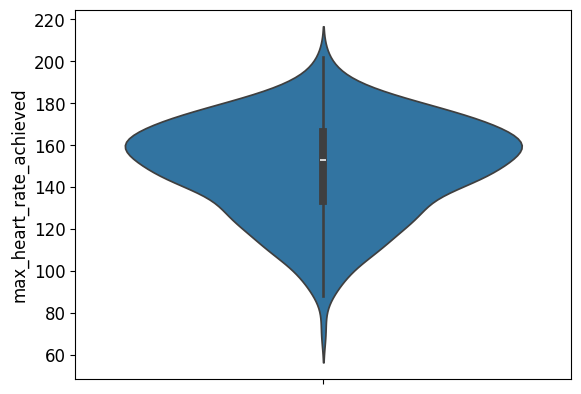

In [ ]:
sns.violinplot(y='max_heart_rate_achieved',data=df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size = 0.30, random_state=42)

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_predict = model.predict(X_test)

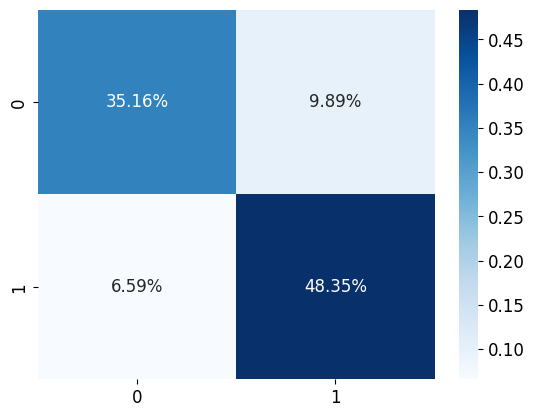

Accuracy is:  83.51648351648352


In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

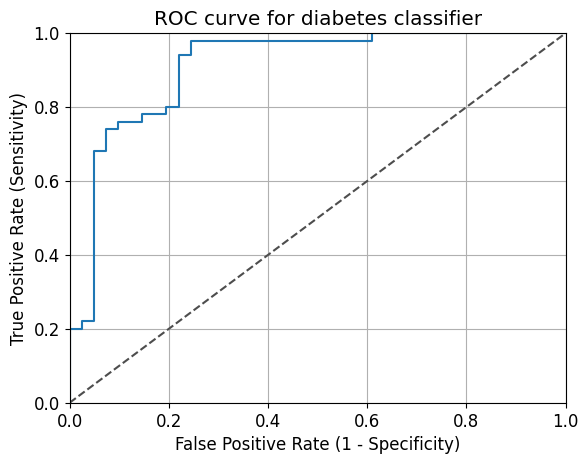

In [ ]:
y_pred_quant = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)

0.911219512195122

#logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter=1000)
logi.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
logi_pred = logi.predict(X_test)

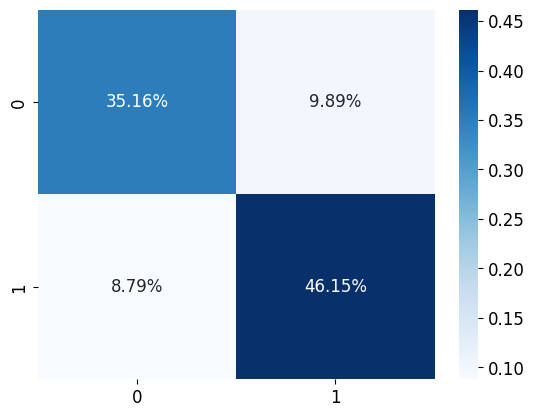

Accuracy is:  81.31868131868131


In [ ]:
cm = confusion_matrix(y_test, logi_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,logi_pred)
print('Accuracy is: ',ac*100)

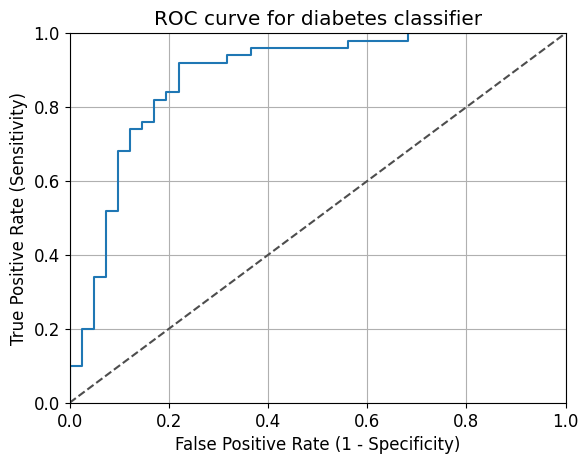

In [ ]:
logi_pred_quant = logi.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logi_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#training the model with neural network


In [ ]:
from sklearn.neural_network import MLPClassifier
neu = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
neu.fit(X_train, y_train)
neu_pred = neu.predict(X_test)

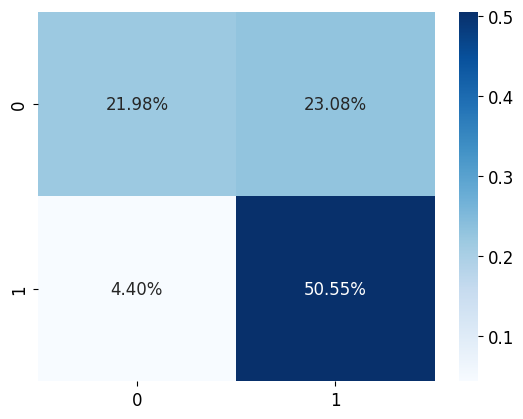

Accuracy is:  72.52747252747253


In [ ]:
cm = confusion_matrix(y_test, neu_pred)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,neu_pred)
print('Accuracy is: ',ac*100)

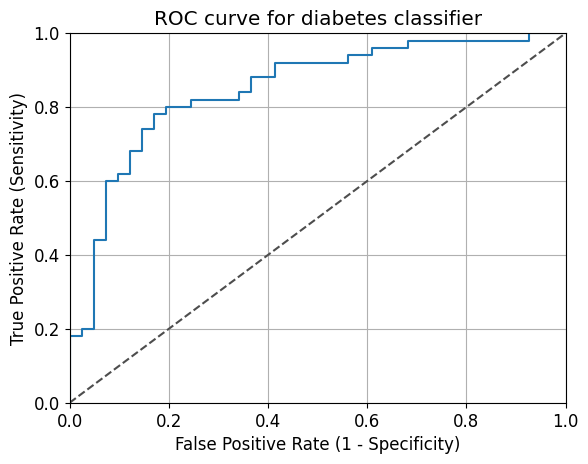

In [ ]:
neu_pred_quant = neu.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, neu_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#Conclusion:- Random Forest Classifier Performed the best among the above models